## **st10083938_rpda8412_ANN - Code.**

### **Step 1: Importing the Libraries.**

In [41]:
# Basic Libaries 
import pandas as pd 
import numpy as np

# Visualisation Libaries
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preprocessing and Model Selection
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Deep Learning Libaries
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Evaluation Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# ______Code_Attribution______
# The following lines of code  was adapted from stackoverflow.
# Author: Prajot Kuvalekar.
# Link: https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

# disabling warning signs
import warnings
warnings.filterwarnings('ignore')
# ______end______

### **Step 2: Performing Data Pre-processing.**
#### ***2.1. Reading an Excel file in Python using Pandas.***

In [42]:
# ______Code_Attribution______
# The following line of code  was adapted from stackoverflow.
# Author: Ajay Sant.
# Link: https://stackoverflow.com/questions/17063458/reading-an-excel-file-in-python-using-pandas
df = pd.read_excel(r"/home/lab_services_student/DATABASE eov.xlsx", sheet_name=0)
# ______End______

In [43]:
df.head()

,id pts,Age,Gender,Weight,Height,FE,Hb,MDRD,Crea,Na,...,Diur_tipo,Dose diur,Diur2_tipo,Dose diur.1,PM,ICD,CRT,Diur_tipo.1,Dose diur.2,Dose equivalente
0,ID01,67.0,1,79.0,168.0,34.9,13.1,40.009083,1.81,135.0,...,1.0,25.0,NaN,NaN,0.0,0.0,0.0,1.0,25.0,25.0
1,ID02,74.0,1,94.0,176.0,32.6,12.4,61.236212,1.23,144.0,...,1.0,125.0,NaN,NaN,1.0,0.0,0.0,1.0,125.0,125.0
2,ID03,46.0,1,84.0,170.0,39.5,15.6,79.207104,1.07,137.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,ID04,69.0,1,87.0,169.0,22.0,15.2,41.077582,1.76,137.0,...,1.0,50.0,NaN,NaN,0.0,1.0,0.0,1.0,50.0,50.0
4,ID05,74.0,1,76.0,167.0,31.6,9.3,37.074659,1.90,139.0,...,1.0,75.0,NaN,NaN,0.0,0.0,0.0,1.0,75.0,75.0


In [44]:
df.columns

Index(['id pts', 'Age', 'Gender', 'Weight', 'Height', 'FE', 'Hb', 'MDRD',
       'Crea', 'Na', 'K', 'BNP', 'VO2_peak', 'VO2_peak_Kg', 'VO2_peak_perc',
       'VE/VCO2 slope', 'Resp_Period', 'Futot', 'ACE_I', 'AT1_I', 'BB',
       'Diuretici', 'Risparmiatore_K', 'exitus', 'card trap 2 anni',
       'card trap 500gg', 'Diuretici.1', 'Diur_tipo', 'Dose diur',
       'Diur2_tipo', 'Dose diur.1', 'PM', 'ICD', 'CRT', 'Diur_tipo.1',
       'Dose diur.2', 'Dose equivalente'],
      dtype='object')

In [45]:
df.shape

(5721, 37)

#### ***2.2. Dropping the various columns below from dataset based on previous literature that used this dataset.***

In [46]:
df_dropped = df.drop(['id pts', 'Weight', 'Height', 'Futot', 'PM', 'Diuretici.1', 'Diur2_tipo', 'Dose diur.1', 
              'Diur_tipo.1', 'Dose diur.2', 'Dose equivalente', 'card trap 2 anni', 
              'card trap 500gg', 'Diur_tipo'], axis=1)

#### ***2.3. Visualising the location of the missing values - using seaborn.heatmap.***

<Axes: >

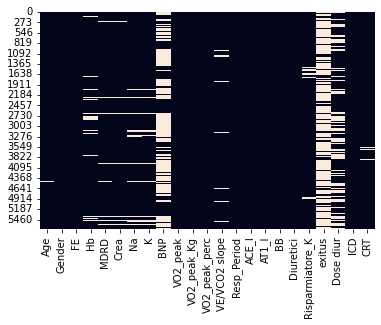

In [47]:
# ______Code_Attribution______
# The following line of code  was adapted from dev.to.
# Author: Tomoyuki Aota.
# Link: https://dev.to/tomoyukiaota/visualizing-the-patterns-of-missing-value-occurrence-with-python-46dj

# The first method is by seaborn.heatmap and next single-line code will visualize the location of missing values.
sns.heatmap(df_dropped.isnull(), cbar=False)
# ______End______

#### ***2.4. Performing “Median” Imputation.***

In [48]:
# ______Code_Attribution______
# The following line of code  was adapted from analyticsvidhya.
# Author: Parth Shukla.
# Link: https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-simpleimputer/

# Using the strategy Median in SimpleImputer allows us to impute the missing value by the median. 
# This strategy can only be used on a numerical dataset.
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# ______End______

In [49]:
# ______Code_Attribution______
# The following lines of code was adapted from analyticsvidhya.
# Author: Parth Shukla.
# Link: https://www.analyticsvidhya.com/blog/2022/10/handling-missing-data-with-s

# ______Code_Attribution______
# The following fix on "Error in Python script "Expected 2D array, got 1D array instead:"?" was adapted from stackoverflow.
# Author: Ofer Sadan.
# Link: https://stackoverflow.com/questions/45554008/error-in-python-script-expected-2d-array-got-1d-array-instead

# Imputing columns with the least amount of null values. 
df_dropped[['Hb']] = imputer.fit_transform(df_dropped[['Hb']])
df_dropped[['MDRD']] = imputer.fit_transform(df_dropped[['MDRD']])
df_dropped[['Crea']] = imputer.fit_transform(df_dropped[['Crea']])
df_dropped[['Na']] = imputer.fit_transform(df_dropped[['Na']])
df_dropped[['K']] = imputer.fit_transform(df_dropped[['K']])
df_dropped[['VO2_peak_Kg']] = imputer.fit_transform(df_dropped[['VO2_peak_Kg']])
df_dropped[['VO2_peak_perc']] = imputer.fit_transform(df_dropped[['VO2_peak_perc']])
df_dropped[['VE/VCO2 slope']] = imputer.fit_transform(df_dropped[['VE/VCO2 slope']])
df_dropped[['ACE_I']] = imputer.fit_transform(df_dropped[['ACE_I']])
df_dropped[['AT1_I']] = imputer.fit_transform(df_dropped[['AT1_I']])
df_dropped[['BB']] = imputer.fit_transform(df_dropped[['BB']])
df_dropped[['Diuretici']] = imputer.fit_transform(df_dropped[['Diuretici']])
df_dropped[['Risparmiatore_K']] = imputer.fit_transform(df_dropped[['Risparmiatore_K']])
df_dropped[['ICD']] = imputer.fit_transform(df_dropped[['ICD']])
df_dropped[['CRT']] = imputer.fit_transform(df_dropped[['CRT']])

# Imputing columns with the most amount of null values. 
df_dropped[['BNP']] = imputer.fit_transform(df_dropped[['BNP']])
df_dropped[['Dose diur']] = imputer.fit_transform(df_dropped[['Dose diur']])
df_dropped[['exitus']] = imputer.fit_transform(df_dropped[['exitus']])

# ______End______
# ______End______

In [50]:
df_dropped.dropna(inplace=True)

In [51]:
print(df_dropped.isnull().sum())

Age                0
Gender             0
FE                 0
Hb                 0
MDRD               0
Crea               0
Na                 0
K                  0
BNP                0
VO2_peak           0
VO2_peak_Kg        0
VO2_peak_perc      0
VE/VCO2 slope      0
Resp_Period        0
ACE_I              0
AT1_I              0
BB                 0
Diuretici          0
Risparmiatore_K    0
exitus             0
Dose diur          0
ICD                0
CRT                0
dtype: int64


In [52]:
print(df_dropped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5699 entries, 0 to 5720
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              5699 non-null   float64
 1   Gender           5699 non-null   int64  
 2   FE               5699 non-null   float64
 3   Hb               5699 non-null   float64
 4   MDRD             5699 non-null   float64
 5   Crea             5699 non-null   float64
 6   Na               5699 non-null   float64
 7   K                5699 non-null   float64
 8   BNP              5699 non-null   float64
 9   VO2_peak         5699 non-null   float64
 10  VO2_peak_Kg      5699 non-null   float64
 11  VO2_peak_perc    5699 non-null   float64
 12  VE/VCO2 slope    5699 non-null   float64
 13  Resp_Period      5699 non-null   int64  
 14  ACE_I            5699 non-null   float64
 15  AT1_I            5699 non-null   float64
 16  BB               5699 non-null   float64
 17  Diuretici        56

### **Step 3: Performing Data Exploratory Data Analysis (EDA).**
#### ***3.1. Looking into the target variable "exitus".***

<Axes: xlabel='count', ylabel='exitus'>

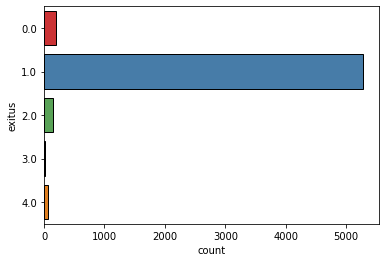

In [53]:
# ______Code_Attribution______
# The following line of code was adapted from python charts.
# Author: Python Charts.
# Link: https://python-charts.com/ranking/countplot-seaborn/#:~:text=If%20you%20want%20to%20override,as%20in%20the%20example%20below.&text=You%20can%20also%20set%20the,color%20argument%20of%20the%20function.

# Plotting a countplot to display the target variable "exitus". 
sns.countplot(y = df_dropped['exitus'], palette="Set1", edgecolor="black")
# ______End______

In [54]:
# ______Code_Attribution______
# The following line of code was adapted from geeksforgeeks.
# Author: Python Charts.
# Link: https://www.geeksforgeeks.org/python-pandas-dataframe-astype/

# Converting column exitus from df_dropped to int64 from float64 using Pandas DataFrame.astype(). 
df_dropped.exitus = df_dropped.exitus.astype('int64')
# ______End______

<Axes: xlabel='count', ylabel='exitus'>

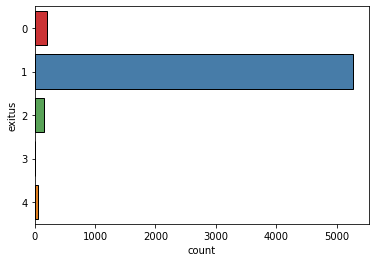

In [55]:
# ______Code_Attribution______
# The following line of code was adapted from python charts.
# Author: Python Charts.
# Link: https://python-charts.com/ranking/countplot-seaborn/#:~:text=If%20you%20want%20to%20override,as%20in%20the%20example%20below.&text=You%20can%20also%20set%20the,color%20argument%20of%20the%20function.

# Plotting a countplot to display the target variable "exitus". 
sns.countplot(y = df_dropped['exitus'], palette="Set1", edgecolor="black")
# ______End______

In [56]:
# ______Code_Attribution______
# The following lines of code was adapted from chatgpt.
# Author: chatgpt.
# Link: https://chatgpt.com/ 

# Remove rows where 'exitus' is 2, 3, or 4
df_cleaned = df_dropped[df_dropped['exitus'].isin([0, 1])]

# Reset index after filtering, if needed
df_cleaned = df_cleaned.reset_index(drop=True)

# Verify the result
print(df_cleaned['exitus'].unique()) 
# ______End______

[1 0]


<Axes: xlabel='count', ylabel='exitus'>

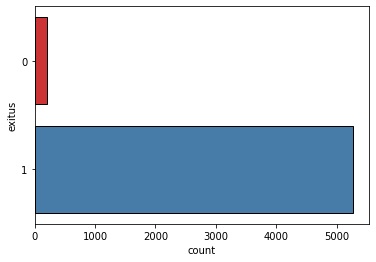

In [57]:
# ______Code_Attribution______
# The following line of code was adapted from python charts.
# Author: Python Charts.
# Link: https://python-charts.com/ranking/countplot-seaborn/#:~:text=If%20you%20want%20to%20override,as%20in%20the%20example%20below.&text=You%20can%20also%20set%20the,color%20argument%20of%20the%20function.

# Plotting a countplot to display the target variable "exitus". 
sns.countplot(y = df_cleaned['exitus'], palette="Set1", edgecolor="black")
# ______End______

In [58]:
print(f"Number of 0's: {np.sum(df_cleaned['exitus'] == 0)}") 
print(f"Number of 1's: {np.sum(df_cleaned['exitus'] == 1)}") 

Number of 0's: 198
Number of 1's: 5278


In [59]:
df_cleaned.columns

Index(['Age', 'Gender', 'FE', 'Hb', 'MDRD', 'Crea', 'Na', 'K', 'BNP',
       'VO2_peak', 'VO2_peak_Kg', 'VO2_peak_perc', 'VE/VCO2 slope',
       'Resp_Period', 'ACE_I', 'AT1_I', 'BB', 'Diuretici', 'Risparmiatore_K',
       'exitus', 'Dose diur', 'ICD', 'CRT'],
      dtype='object')

### **Step 4: Preparing the Data for Analysis.**
#### ***4.1. Defining the "X" and "y" labels.***

In [60]:
X = df_cleaned.drop(['exitus'], axis=1)
y = df_cleaned.drop(['Age', 'Gender', 'FE', 'Hb', 'MDRD', 'Crea', 'Na', 'K', 'BNP',
       'VO2_peak', 'VO2_peak_Kg', 'VO2_peak_perc', 'VE/VCO2 slope',
       'Resp_Period', 'ACE_I', 'AT1_I', 'BB', 'Diuretici', 'Risparmiatore_K',
       'Dose diur', 'ICD', 'CRT'], axis=1)

In [61]:
print(X.shape)
print(y.shape)

(5476, 22)
(5476, 1)


#### ***4.2. Applying SMOTE to handle the imbalance of the data within the dataset by balancing it using SMOTE.***

In [62]:
smt = SMOTE()

In [63]:
X_sm, y_sm = smt.fit_resample(X, y)

#### ***4.3. Splitting the data in training and testing.***


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

#### ***4.4. Scaling the data.***

In [65]:
sc = StandardScaler()

In [66]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [67]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(8444, 22)
(2112, 22)
(8444, 1)
(2112, 1)


### **Step 5: Building the ANN model, with Early Stopping.**
#### ***5.1. Building the ANN model.***

In [68]:
# ______Code_Attribution______
# The following lines of code  was adapted from geeksforgeeks.
# Author: sanjaysdev0901.
# Link: https://www.geeksforgeeks.org/artificial-neural-network-in-tensorflow/
ann = keras.Sequential([ 
    keras.layers.Dense(16, input_shape=(22,), activation='relu'), 
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(32, activation='relu'), 
    keras.layers.Dense(2, activation='softmax') 
]) 
# ______End______

In [69]:
# ______Code_Attribution______
# The following lines of code  was adapted from geeksforgeeks.
# Author: sanjaysdev0901.
# Link: https://www.geeksforgeeks.org/artificial-neural-network-in-tensorflow/
ann.compile(optimizer = 'adam', loss=keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])
# ______End______

#### ***5.2. Early Stopping.***

In [70]:
early_stopping = EarlyStopping(
    monitor='val_loss',       
    patience=1,              
    restore_best_weights=True 
)

### **Step 6: Training ANN with specified parameters, including early stopping.**

In [71]:
history = ann.fit(X_train_scaled, y_train, batch_size = 10, epochs = 100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6450 - loss: 0.6291 - val_accuracy: 0.7460 - val_loss: 0.5171
Epoch 2/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7702 - loss: 0.4845 - val_accuracy: 0.8011 - val_loss: 0.4290
Epoch 3/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8200 - loss: 0.3996 - val_accuracy: 0.8360 - val_loss: 0.3680
Epoch 4/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8608 - loss: 0.3311 - val_accuracy: 0.8490 - val_loss: 0.3460
Epoch 5/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8835 - loss: 0.2989 - val_accuracy: 0.8662 - val_loss: 0.3183
Epoch 6/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8946 - loss: 0.2625 - val_accuracy: 0.8709 - val_loss: 0.3178
Epoch 7/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9022 - loss: 0.2489 - val_accuracy: 0.8769 - val_loss: 0.3010
Epoch 8/100
676/676 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9125 - loss: 0.2217 - val_accu

In [72]:
loss, accuracy = ann.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.2436
Test Accuracy: 0.9157


### **Step 7: Model Evaluation and Performance Metrics Analysis.**
#### ***7.1. Plotting a line graph showing the loss and accuracy in Training and Validation.***

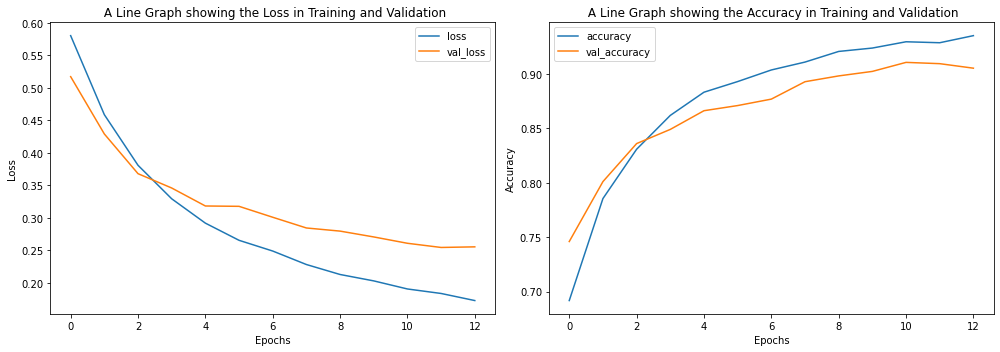

In [73]:
# ______Code_Attribution______
# The following lines of code  was adapted from Medium.
# Author: Sudip Shrestha.
# Link: https://towardsdatascience.com/nlp-spam-detection-in-sms-text-data-using-d
metrics = pd.DataFrame(history.history)

def plot_graphs(var1, var2, string, ax):
    metrics[[var1, var2]].plot(ax=ax)
    ax.set_title(' A Line Graph showing the ' + string + ' in Training and Validation')
    ax.set_xlabel('Epochs')
    ax.set_ylabel(string)
    ax.legend([var1, var2]) 
    
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
plot_graphs('loss', 'val_loss', 'Loss', axes[0])

plot_graphs('accuracy', 'val_accuracy', 'Accuracy', axes[1])

plt.tight_layout()
plt.show()
# ______end______

In [74]:
y_pred_probs = ann.predict(X_test_scaled)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [75]:
y_pred = (y_pred_probs >= 0.5).astype(int)

#### ***7.2. Printing a classification report.***

In [76]:
# creating the classification report.
report = classification_report(y_test, y_pred[:, 1])
# printing classification report. 
print(report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1039
           1       0.96      0.87      0.91      1073

    accuracy                           0.92      2112
   macro avg       0.92      0.92      0.92      2112
weighted avg       0.92      0.92      0.92      2112



In [77]:
# ______Code_Attribution______
# The following lines of code  was adapted from youtube.com.
# Author: Professor Rahul Jain.
# Link: https://www.youtube.com/watch?v=VVsvl4WdkfM
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
# ______End______

In [78]:
# ______Code_Attribution______
# The following lines of code  was adapted from youtube.com.
# Author: Professor Rahul Jain.
# Link: https://www.youtube.com/watch?v=VVsvl4WdkfM
auc_score = roc_auc_score(y_test, y_pred[:, 1])
# ______End______

In [79]:
# ______Code_Attribution______
# The following lines of code  was adapted from youtube.com.
# Author: Professor Rahul Jain.
# Link: https://www.youtube.com/watch?v=VVsvl4WdkfM
print(f'AUC Score: {auc_score}')
# ______End______

AUC Score: 0.9165060317693818


#### ***7.3. Plotting a AUC ROC graph.***

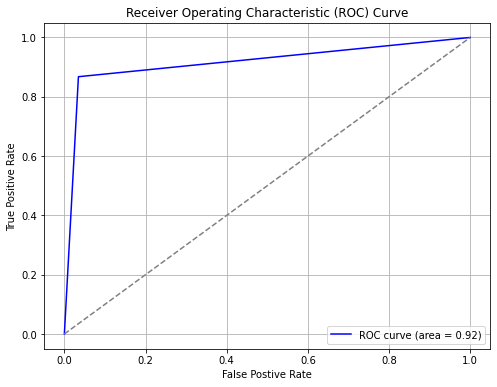

In [80]:
# ______Code_Attribution______
# The following lines of code  was adapted from youtube.com.
# Author: Professor Rahul Jain.
# Link: https://www.youtube.com/watch?v=VVsvl4WdkfM
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
# ______End______